In [1]:
# import lib
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
np.set_printoptions(precision=10,suppress=True)
np.random.seed(6789)

(200, 2)
(300, 2)


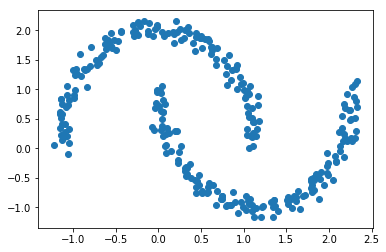

In [2]:
# create data
n_samples  = 100
n_outliers = 50
x, y      = datasets.make_regression(n_samples=n_samples, n_features=1,n_informative=1, noise=94, random_state=0)
X1         = np.append(x,y[:,None],1)
x, y      = datasets.make_regression(n_samples=n_samples, n_features=1,n_informative=1, noise=9, random_state=0)
X2         = np.append(x,y[:,None],1) + 5
X = np.append(X1,X2,0)

print(X.shape)

x -= np.mean(x, axis = 0)
# plt.scatter(X[:,0],X[:,1]); plt.show()


# X, y = datasets.make_circles(n_samples=300, noise=0.03,factor=0.3)
# x -= np.mean(x, axis = 0)
# print(X.shape)
# plt.scatter(X[:,0],X[:,1]); plt.show()

X, y = datasets.make_moons(n_samples=300, random_state=123,noise=0.05)
X = (X-np.mean(x, axis = 0))/(X.std(0))
print(X.shape)
plt.scatter(X[:,0],X[:,1]); plt.show()

In [3]:

numberes = 3
def g (x): return x*(1/numberes)
def gg(x): return x*numberes

def g_grad(x):  return ((1/numberes)*(x*np.sign(x))**(1-(1/numberes)))*np.sign(x)
def gg_grad(x): return (numberes*(x*np.sign(x))**(numberes-1))*np.sign(x)

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1. / np.sqrt(s)), u.T), W)

print(gg(g(-0.23123)))
print(gg(g(0.23123)))
print(gg(g(32132)))
print(gg(g(-32132)))
print(gg(g(-1/331)))
print(-1/331)

-0.23122999999999996
0.23122999999999996
32132.0
-32132.0
-0.0030211480362537764
-0.0030211480362537764


iter: 0 Current loss: 1.1909251586925174
iter: 300 Current loss: 0.30591720362386504
iter: 600 Current loss: 0.3233102823989046
iter: 900 Current loss: 0.3407499149242983
iter: 1200 Current loss: 0.3582436849128468
iter: 1500 Current loss: 0.3758186491491755
iter: 1800 Current loss: 0.3934392660779346
iter: 2100 Current loss: 0.41108332412175114
iter: 2400 Current loss: 0.4287600869305843
iter: 2700 Current loss: 0.44647418851138204
iter: 3000 Current loss: 0.46419376086729625
iter: 3300 Current loss: 0.48191271471512837
iter: 3600 Current loss: 0.4996249875292717
iter: 3900 Current loss: 0.5173245844668508
iter: 4200 Current loss: 0.5350174125264099
iter: 4500 Current loss: 0.552708519832189
iter: 4800 Current loss: 0.5703693173535082
iter: 5100 Current loss: 0.5879940767034116
iter: 5400 Current loss: 0.6055772611798066
iter: 5700 Current loss: 0.6231134704352143
iter: 6000 Current loss: 0.6405974351224961
iter: 6300 Current loss: 0.6580240458264245
iter: 6600 Current loss: 0.6753883

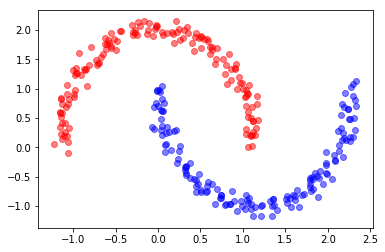

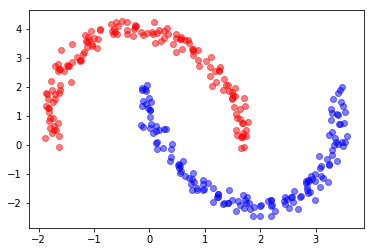

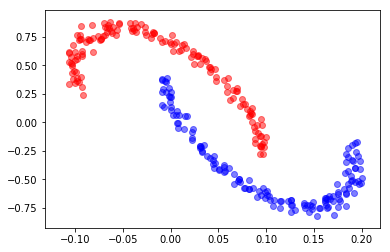

In [64]:
# simple objective

# w1 = np.random.uniform(0,1,size=(2,1))
# w2 = np.random.uniform(0,1,size=(1,3))

w1 = np.random.randn(2,6)
w2 = np.random.randn(6,3)

# w1 = _sym_decorrelation(w1)
# w2 = _sym_decorrelation(w2)

w1 = w1 / np.sqrt((w1**2).sum(0))
w2 = w2 / np.sqrt((w2**2).sum(0))

m1 = np.zeros_like(w1); 
v1 = np.zeros_like(w1)
m2 = np.zeros_like(w2); 
v2 = np.zeros_like(w2)

# simple objective
for iter in range(8000):
    
    y1 = X  @ w1  
    y2 = g(y1)
    y3 = y2 @ w2
    y4 = y3 @ w2.T
    y5 = gg(y4)
    y6 = y5 @ w1.T 
    
    loss = np.sqrt((X-y6)**2)
    dgrad_y6 = (X-y6)/( np.sqrt((X-y6)**2) +1e-8)
    
    dgrad_y5 = dgrad_y6 @ w1
    dgrad_y4 = dgrad_y5 * gg_grad(y4)
    dgrad_w2T= y3.T@(dgrad_y4)
    dgrad_w2 = y2.T @(dgrad_y4 @ w2) + dgrad_w2T.T - (np.eye(y2.shape[1])+3 * y2.T@y2)@w2

    dgrad_w1T= y5.T@(dgrad_y6)
    dgrad_w1 = X.T@((dgrad_y4 @ w2)@w2.T * g_grad(y1)) + dgrad_w1T.T

    m1 = 0.9 * m1   + (1-0.9)   * dgrad_w1
    m2 = 0.9 * m2   + (1-0.9)   * dgrad_w2
    
    v1 = 0.999 * v1   + (1-0.999)   * dgrad_w1 **2
    v2 = 0.999 * v2   + (1-0.999)   * dgrad_w2 **2
    m_hat1 = m1/(1-0.9); v_hat1 = v1/(1-0.999)
    m_hat2 = m2/(1-0.9); v_hat2 = v2/(1-0.999)

    # (m_hat2/(v_hat2**0.5 + 1e-8) )
    w1 = w1 - 0.00000008 * m1
    w2 = w2 - 0.00000008 * m2
    
    w1 = _sym_decorrelation(w1)
#     w2 = _sym_decorrelation(w2)
    w1 = w1 / np.sqrt((w1**2).sum(0))
    w2 = w2 / np.sqrt((w2**2).sum(0))

    if iter%300 == 0 : print("iter: "+ str(iter)+" Current loss: " + str(loss.mean())  )

    
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.show()

plt.scatter(y6[y==0, 0], y6[y==0, 1], color='red', alpha=0.5)
plt.scatter(y6[y==1, 0], y6[y==1, 1], color='blue', alpha=0.5)
plt.show()


try:
    plt.scatter(y3[y==0, 0], y3[y==0, 2], color='red', alpha=0.5)
    plt.scatter(y3[y==1, 0], y3[y==1, 2], color='blue', alpha=0.5)
    plt.show()
except:
    plt.scatter(y3[y==0, 0], np.zeros((len(y3)//2,1)), color='red', alpha=0.5)
    plt.scatter(y3[y==1, 0], np.zeros((len(y3)//2,1)), color='blue', alpha=0.5)
    plt.show()


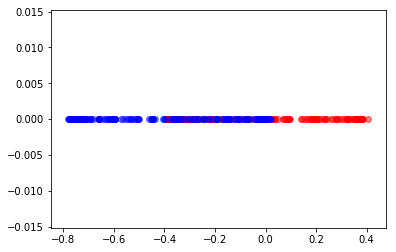

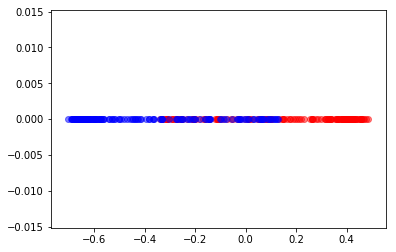

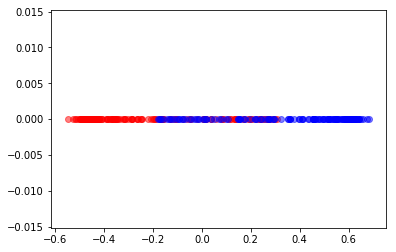

In [63]:
plt.scatter(y3[y==0, 0], np.zeros((len(y3)//2,1)), color='red', alpha=0.5)
plt.scatter(y3[y==1, 0], np.zeros((len(y3)//2,1)), color='blue', alpha=0.5)
plt.show()
plt.scatter(y3[y==0, 1], np.zeros((len(y3)//2,1)), color='red', alpha=0.5)
plt.scatter(y3[y==1, 1], np.zeros((len(y3)//2,1)), color='blue', alpha=0.5)
plt.show()
plt.scatter(y3[y==0, 2], np.zeros((len(y3)//2,1)), color='red', alpha=0.5)
plt.scatter(y3[y==1, 2], np.zeros((len(y3)//2,1)), color='blue', alpha=0.5)
plt.show()

iter: 0 Current loss: 0.4870903982081256
iter: 300 Current loss: 2.287063044735064e-16
iter: 600 Current loss: 4.1234196323606624e-16


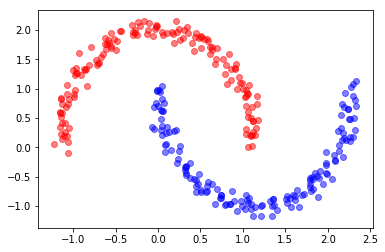

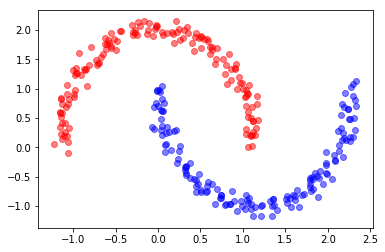

In [161]:
# simple objective

# w1 = np.random.uniform(0,1,size=(2,3))
# w2 = np.random.uniform(0,1,size=(3,3))

w1 = np.random.randn(2,3)
w2 = np.random.randn(3,3)

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1. / np.sqrt(s)), u.T), W)

w1 = _sym_decorrelation(w1)
w2 = _sym_decorrelation(w2)
w1 = w1 / np.sqrt((w1**2).sum(0))
w2 = w2 / np.sqrt((w2**2).sum(0))

m1 = np.zeros_like(w1); v1 = np.zeros_like(w1)
m2 = np.zeros_like(w2); v2 = np.zeros_like(w2)

# simple objective
for iter in range(800):
    
    y1=  X @ w1 ; y2= g(y1)
    y3= y2 @ w2 ; y4= g(y3)
    
    y5= gg(y4)  ; y6= y5@ w2.T 
    y7= gg(y6)  ; y8= y7@ w1.T 
    
    loss = np.sqrt((X-y8)**2)
    
    dgrad_loss = (X-y8)/(np.sqrt( (X-y8)**2) + 1e-8)
    dgrad_w2T  = y5.T @ ((dgrad_loss @ w1) * gg_grad(y6))
    dgrad_w2   = y2.T @(((dgrad_loss @ w1) * gg_grad(y6) @ w2)*gg_grad(y4) ) + dgrad_w2T.T
    
    dgrad_W1T  = y7.T @ dgrad_loss
    dgrad_W1   = X.T@((((((dgrad_loss@w1)* gg_grad(y6))@w2)*gg_grad(y4)*g_grad(y3))@w2.T)*g_grad(y1))  + dgrad_W1T.T

    m1 = 0.9 * m1   + (1-0.9)   * dgrad_W1
    m2 = 0.9 * m2   + (1-0.9)   * dgrad_w2
    v1 = 0.999 * v1   + (1-0.999)   * dgrad_W1 **2
    v2 = 0.999 * v2   + (1-0.999)   * dgrad_w2 **2
    m_hat1 = m1/(1-0.0); v_hat1 = v1/(1-0.999)
    m_hat2 = m2/(1-0.0); v_hat2 = v2/(1-0.999)

    if iter%300 == 0 : print("iter: "+ str(iter)+" Current loss: " + str(loss.mean())  )
    w1 = w1 - 0.00008 * (m_hat1/(v_hat1**0.5 + 1e-8) )
    w2 = w2 - 0.00008 * (m_hat2/(v_hat2**0.5 + 1e-8) )
    
    w1 = _sym_decorrelation(w1)
    w2 = _sym_decorrelation(w2)
#     w1 = w1 / np.sqrt((w1**2).sum(0))
#     w2 = w2 / np.sqrt((w2**2).sum(0))
    
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.show()

plt.scatter(y8[y==0, 0], y8[y==0, 1], color='red', alpha=0.5)
plt.scatter(y8[y==1, 0], y8[y==1, 1], color='blue', alpha=0.5)
plt.show()

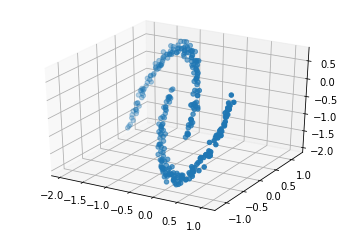

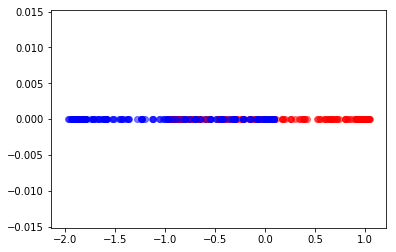

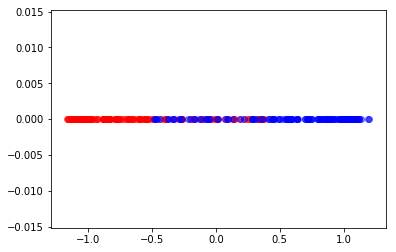

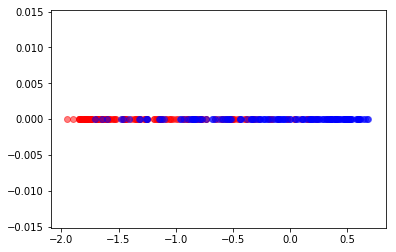

In [181]:
# %matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(y4[:,0], y4[:,1], y4[:,2])
plt.show()

plt.scatter(y4[y==0, 0], np.zeros(len(y4)//2), color='red', alpha=0.5)
plt.scatter(y4[y==1, 0], np.zeros(len(y4)//2), color='blue', alpha=0.5)
plt.show()

plt.scatter(y4[y==0, 1], np.zeros(len(y4)//2), color='red', alpha=0.5)
plt.scatter(y4[y==1, 1], np.zeros(len(y4)//2), color='blue', alpha=0.5)
plt.show()

plt.scatter(y4[y==0, 2], np.zeros(len(y4)//2), color='red', alpha=0.5)
plt.scatter(y4[y==1, 2], np.zeros(len(y4)//2), color='blue', alpha=0.5)
plt.show()


In [100]:
b1

8.093313583243936e-10

(200, 2)
(200, 2)
-1.744011651702943   59.43445833173476   -247.6790298909393   288.82236094566673
0.059170886847916895   6.606406184951791   -24.18528386153794   20.688867296907766
EVD basis vector :  [0.0087124428 0.9999620459]
MY  basis vector :  [0.0053035781 0.9999859359 0.9999859359 0.0053035781]
[[1. 0.]
 [0. 1.]]
MY  basis vector :  [0.6672170756 0.7448633257 0.7448633257 0.6672170756]
[[1. 0.]
 [0. 1.]]


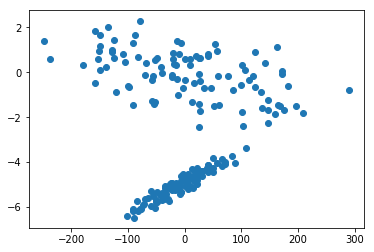

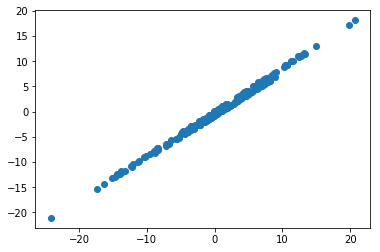

In [175]:
gt_compare = X @ evecs
my_compare = y4
print(gt_compare.shape)
print(my_compare.shape)

print(gt_compare.mean()," ", gt_compare.std()," ", gt_compare.min()," ", gt_compare.max())
print(my_compare.mean()," ", my_compare.std()," ", my_compare.min()," ", my_compare.max())

print("EVD basis vector : ",(good_project*np.sign(good_project)).ravel())
print("MY  basis vector : ",(w1*np.sign(w1)).ravel())
print(w1@w1)
print("MY  basis vector : ",(w2*np.sign(w2)).ravel())
print(w2@w2)

# plt.scatter(range(len(gt_compare)),gt_compare); 
# plt.scatter(range(len(my_compare)),my_compare); plt.show()

plt.scatter(gt_compare[:,0],gt_compare[:,1]);         plt.show()
plt.scatter(my_compare[:,0],my_compare[:,1]);         plt.show()
plt.show()

[0.9962519412 0.0864989571]


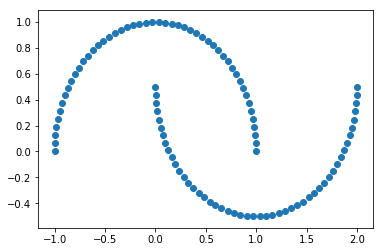

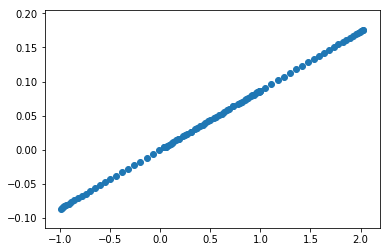

In [54]:
cov = X.T @ X / X.shape[0]
evals,evecs = np.linalg.eig(cov)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]
print(evecs[0,:])
good_project = evecs[0,:][:,None]
recon_gt = (X @ good_project @ good_project.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon_gt[:,0],recon_gt[:,1]); plt.show()

(200, 2)


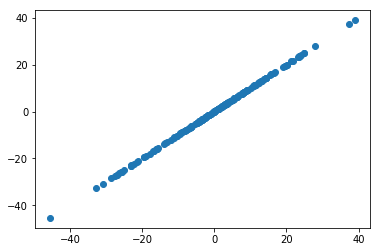

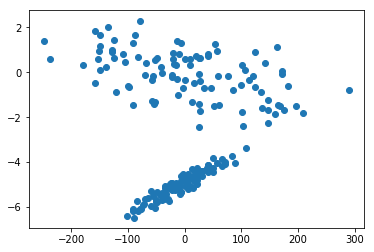

In [96]:
gt_2d = X @evecs
print(gt_2d.shape)
plt.scatter(y4[:,0],y4[:,1]); plt.show()
plt.scatter(gt_2d[:,0],gt_2d[:,1]); plt.show()

In [146]:
good_project

array([[-0.02331227],
       [-0.99972823]])

In [147]:
w

array([[0.17628245],
       [0.98433963]])

[[0.53163258]
 [0.84697509]]
Current loss: 243.18822607516861  Weight : [0.53163258 0.84697509]
Current loss: 303.25917148804814  Weight : [0.5904391  0.80708219]
Current loss: 339.95656698581485  Weight : [0.62344997 0.78186324]


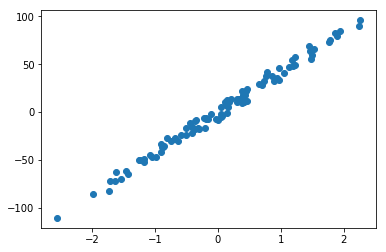

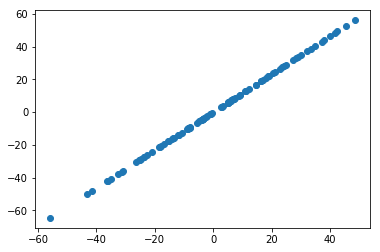

[[0.65277955]
 [0.75754792]]


In [189]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
w = w / np.sqrt((w**2).sum())
print(w)
m = np.zeros_like(w)
v = np.zeros_like(w)

# simple objective
for iter in range(3000):
    loss = (X - X @ w @ w.T)
    grad = (X.T @ loss @ w) + (w.T@X.T@loss).T + 0.01*w
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%1000 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w - 0.00008 * (m_hat/(np.sqrt(v_hat)+1e-8))
    w = w / np.sqrt((w**2).sum())

recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

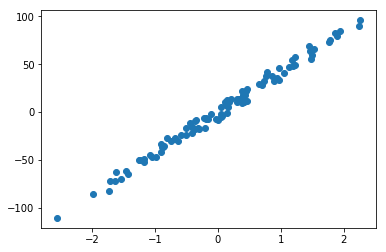

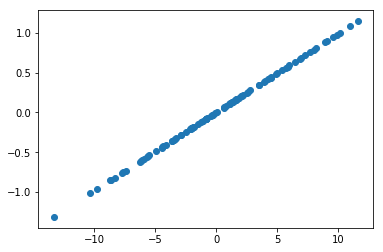

[[0.99518299]
 [0.09803477]]


In [66]:
recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]); 
plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

[[0.96485399]
 [0.26278656]]
Current loss: 853.0707262825993  Weight : [0.96485399 0.26278656]
Current loss: 0.00504240287753152  Weight : [0.02331227 0.99972823]
Current loss: 0.00504240287753152  Weight : [0.02331227 0.99972823]


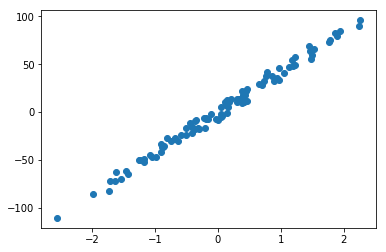

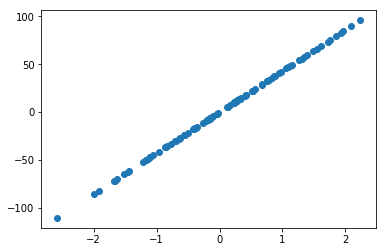

[[0.02331227]
 [0.99972823]]


In [190]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
w = w / np.sqrt((w**2).sum())
print(w)
m = np.zeros_like(w)
v = np.zeros_like(w)

# simple objective
for iter in range(3000):
    loss = (X - X @ w @ w.T)
    grad = (np.eye(2) + 0.00008 * X.T @ X) @ w
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%1000 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w - grad
    w = w / np.sqrt((w**2).sum())

recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

[[0.14193065]
 [0.9898766 ]]
Current loss: 13.11429302103555  Weight : [0.14193065 0.9898766 ]
Current loss: 0.005042402877531518  Weight : [0.02331227 0.99972823]
Current loss: 0.005042402877531518  Weight : [0.02331227 0.99972823]


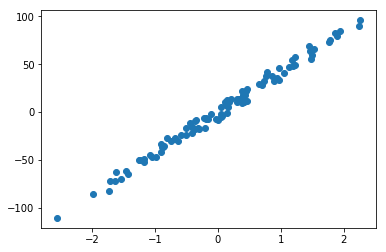

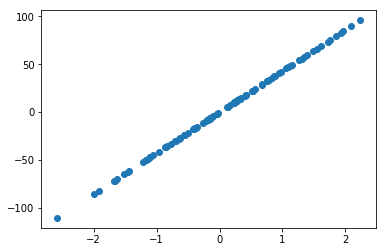

[[0.02331227]
 [0.99972823]]


In [161]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
w = w / np.sqrt((w**2).sum())
print(w)
m = np.zeros_like(w)
v = np.zeros_like(w)

# simple objective
for iter in range(3000):
    loss = (X - X @ w @ w.T)
    grad = (X.T@X@w)
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%1000 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w + grad
    w = w / np.sqrt((w**2).sum())

recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

In [56]:
# simple objective
w = np.random.randn(2,1)
print(w)

ww = w/np.sqrt((w**2).sum())
print(ww)
print((ww**2).sum())

[[-0.99090501]
 [ 0.4142096 ]]
[[-0.92263583]
 [ 0.3856723 ]]
1.0


In [54]:
temp = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
print(np.sqrt(temp**2).sum())
print(
np.linalg.norm(temp)
)
print(
np.sqrt((temp**2).sum())
)
print(
temp@temp.T
)
print(
(temp**2).sum()
)

1.4142135623730951
1.0
1.0
1.0000000000000002
1.0000000000000002


# Reference 
1. Brownlee, J. (2018). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved 30 March 2019, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
2. notebook, S., & Davies, L. (2017). Shortcut key for changing code cell to markdown cell in jupyter notebook. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/47787721/shortcut-key-for-changing-code-cell-to-markdown-cell-in-jupyter-notebook
3. NumPy?, H., Hoogendoorn, E., Feicho, E., Travnik, J., & Hsu, W. (2014). How to normalize an array in NumPy?. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy
4. An overview of gradient descent optimization algorithms. (2016). Sebastian Ruder. Retrieved 30 March 2019, from http://ruder.io/optimizing-gradient-descent/index.html#adam
5. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 30 March 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-resultsa